In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("D://proyectosAnalisisDatos//TechSalariesBD//Tech_salaries.csv")

# Primer vistazo
print(df.head())


  Employee_ID           Full_Name      Gender  Age             Job_Role  \
0   EMP-10000        James Warren  Non-Binary   29    Software Engineer   
1   EMP-10001    Kimberly Holland  Non-Binary   27  Engineering Manager   
2   EMP-10002  Gregory Fitzgerald        Male   54  Engineering Manager   
3   EMP-10003         John Jordan        Male   50  Engineering Manager   
4   EMP-10004    Cameron Anderson      Female   31       UI/UX Designer   

   Years_Experience         Education    Office_Location  Salary  \
0                17  Associate Degree        Seattle, WA  121878   
1                27       High School  San Francisco, CA  190483   
2                 1               PhD        Seattle, WA  191426   
3                17       High School         Austin, TX  217486   
4                21       High School       New York, NY  125265   

   Performance_Score  Is_Manager   Department   Hire_Date  
0                  1           0  Engineering  2006-07-22  
1                  2

In [ ]:

print(df.info())  # Ver tipos de datos y nulos


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Employee_ID        100000 non-null  object
 1   Full_Name          100000 non-null  object
 2   Gender             100000 non-null  object
 3   Age                100000 non-null  int64 
 4   Job_Role           100000 non-null  object
 5   Years_Experience   100000 non-null  int64 
 6   Education          100000 non-null  object
 7   Office_Location    100000 non-null  object
 8   Salary             100000 non-null  int64 
 9   Performance_Score  100000 non-null  int64 
 10  Is_Manager         100000 non-null  int64 
 11  Department         100000 non-null  object
 12  Hire_Date          100000 non-null  object
dtypes: int64(5), object(8)
memory usage: 9.9+ MB
None


In [4]:
print(df.describe())  # Estadísticas básicas

                 Age  Years_Experience         Salary  Performance_Score  \
count  100000.000000     100000.000000  100000.000000      100000.000000   
mean       43.565580         19.999230  146193.652340           3.001250   
std        12.701411         11.798986   49871.619797           1.413771   
min        22.000000          0.000000   50000.000000           1.000000   
25%        33.000000         10.000000  108460.750000           2.000000   
50%        44.000000         20.000000  139226.500000           3.000000   
75%        55.000000         30.000000  176702.250000           4.000000   
max        65.000000         40.000000  339654.000000           5.000000   

          Is_Manager  
count  100000.000000  
mean        0.211100  
std         0.408091  
min         0.000000  
25%         0.000000  
50%         0.000000  
75%         0.000000  
max         1.000000  


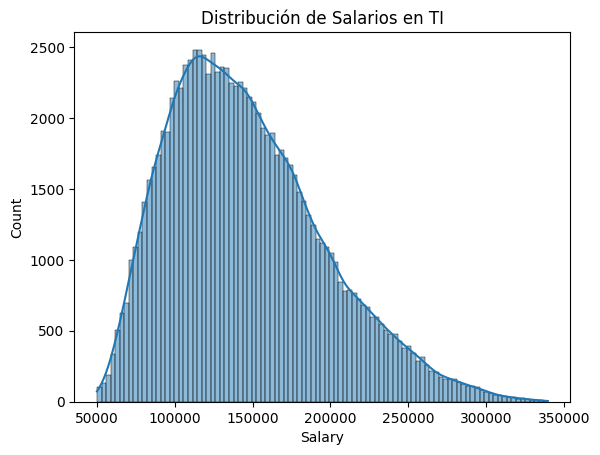

In [20]:
sns.histplot(df['Salary'], kde=True)
plt.title("Distribución de Salarios en TI")
plt.show()

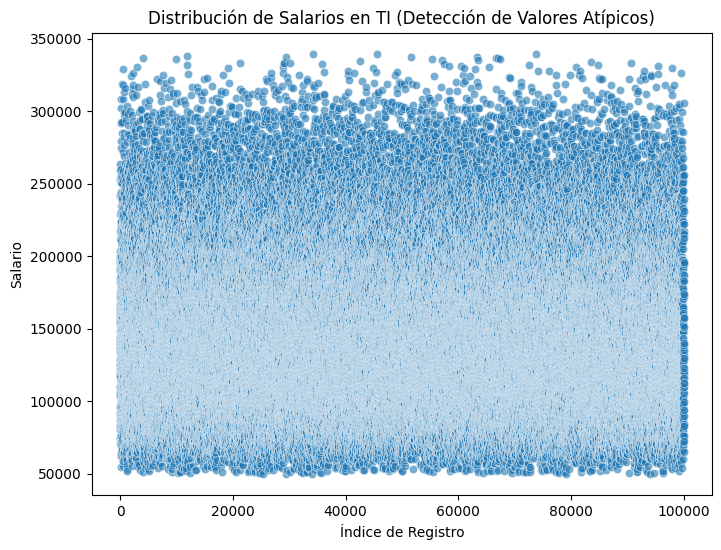

In [21]:
# Crear el gráfico de dispersión para detectar valores atípicos
plt.figure(figsize=(8, 6))
sns.scatterplot(y=df['Salary'], x=range(len(df)), alpha=0.6)

# Mejorar la presentación
plt.title("Distribución de Salarios en TI (Detección de Valores Atípicos)")
plt.xlabel("Índice de Registro")
plt.ylabel("Salario")
plt.show()


C:\Users\Alienware X15\AppData\Local\Temp\ipykernel_29588\3774520462.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Office_Location'] = pd.Categorical(df_filtered['Office_Location'], categories=avg_salary_by_country, ordered=True)


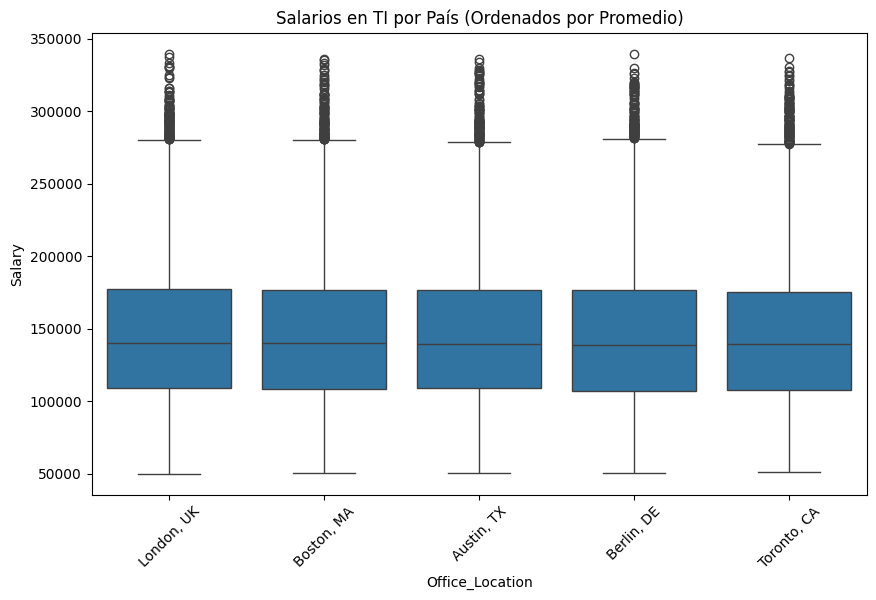

In [18]:
# Filtrar los 5 países con más registros
top_countries = df['Office_Location'].value_counts().head(5).index
df_filtered = df[df['Office_Location'].isin(top_countries)]

# Ordenar los países por salario promedio
avg_salary_by_country = df_filtered.groupby('Office_Location')['Salary'].mean().sort_values(ascending=False).index
df_filtered['Office_Location'] = pd.Categorical(df_filtered['Office_Location'], categories=avg_salary_by_country, ordered=True)

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_filtered, x='Office_Location', y='Salary')
plt.xticks(rotation=45)
plt.title("Salarios en TI por País (Ordenados por Promedio)")
plt.show()


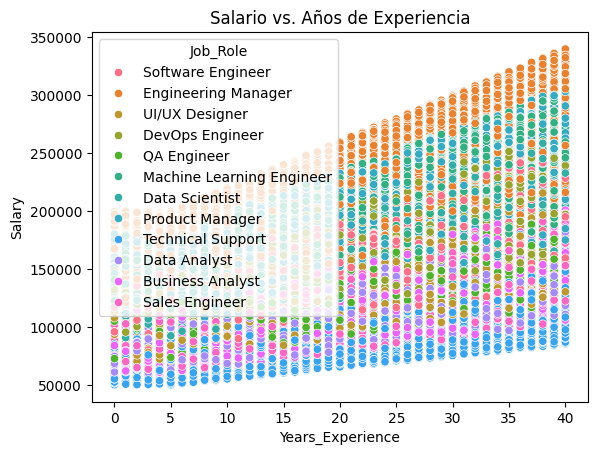

In [12]:
sns.scatterplot(data=df, x='Years_Experience', y='Salary', hue='Job_Role')
plt.title("Salario vs. Años de Experiencia")
plt.show()